In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import golden
plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(13.0, 13.0/golden))

# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'CDistance'

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] <= 12)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
tragitti = tragitti[post_lock_cond]

# PULIZIA DATI
distance_cond = tragitti[distance_param] != 0
moovit_cond = tragitti['Public'] > 12
public_cond = tragitti['Public'] != 0
bike_cond = tragitti['Bike'] != 0
foot_cond = tragitti['Foot'] != 0
car_cond = tragitti['Car'] != 0
car2go_cond = tragitti['Car2Go'] != 0
enjoy_cond = tragitti['Enjoy'] != 0
coherence_cond = (tragitti['Car'] <= tragitti['Car2Go']) & (tragitti['Car'] <= tragitti['Enjoy'])
cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond

In [2]:
# Velocita' media durante il giorno
def vmedia_giorno(df, mezzo):
    ore = range(7, 24)
    vmedia_giorno_ore = []
    for ora in ore:
        tragitti_fascia_oraria = df[df['Hour'] == ora]
        velocita_media_oraria = (tragitti_fascia_oraria[distance_param] * 60.) / tragitti_fascia_oraria[mezzo]
        vmedia_giorno_ore.append(velocita_media_oraria.mean())
    return vmedia_giorno_ore
    
def vmedia_week(df, mezzo):
    short_paths = df[distance_param].between(2.0, 4.0)
    medium_paths = df[distance_param].between(4.0, 6.0)
    long_paths = df[distance_param].between(6.0, 10.0)
    
    lst = [
        vmedia_giorno(df[short_paths], mezzo),
        vmedia_giorno(df[medium_paths], mezzo),
        vmedia_giorno(df[long_paths], mezzo)]
    
    array = np.array(lst).T
    
    return pd.DataFrame(array, index=range(7,24), columns=['[2, 4) km', '[4, 6) km', '[6, 10) km']).round(2)

wcolors = ['blue', 'green', 'purple']

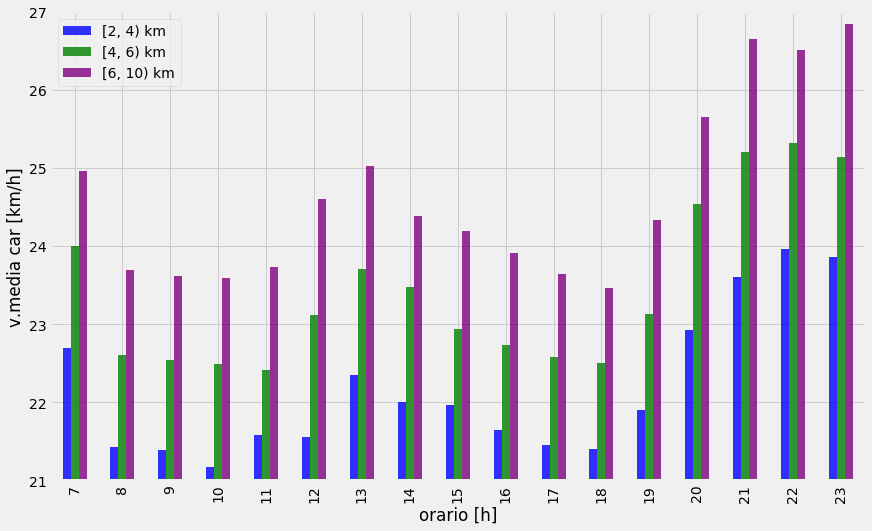

In [3]:
vmedia_week(tragitti[car_cond], 'Car').plot.bar(color=wcolors, alpha=.8)
plt.ylim(21, 27)
plt.xlabel('orario [h]')
plt.ylabel('v.media car [km/h]')
plt.show()

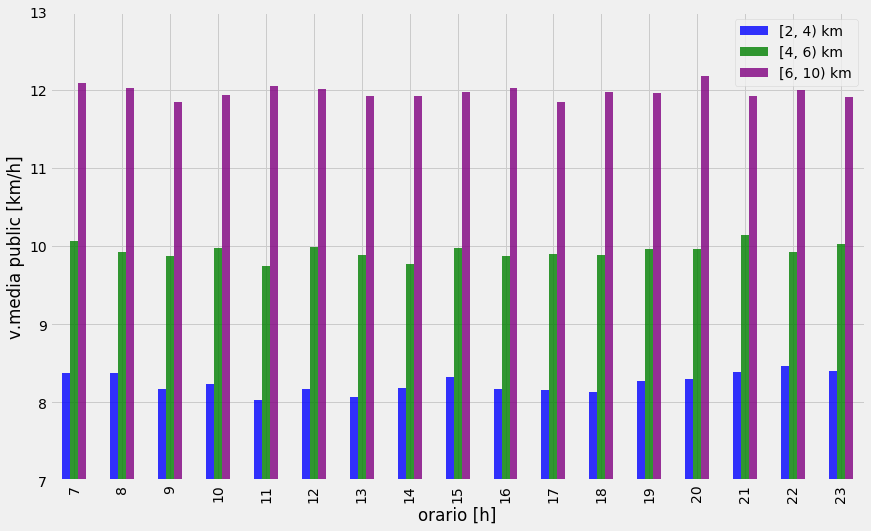

In [4]:
vmedia_week(tragitti[public_cond], 'Public').plot.bar(color=wcolors, alpha=.8)
plt.ylim(7, 13)
plt.yticks(range(7, 14, 1))
plt.xlabel('orario [h]')
plt.ylabel('v.media public [km/h]')
plt.show()

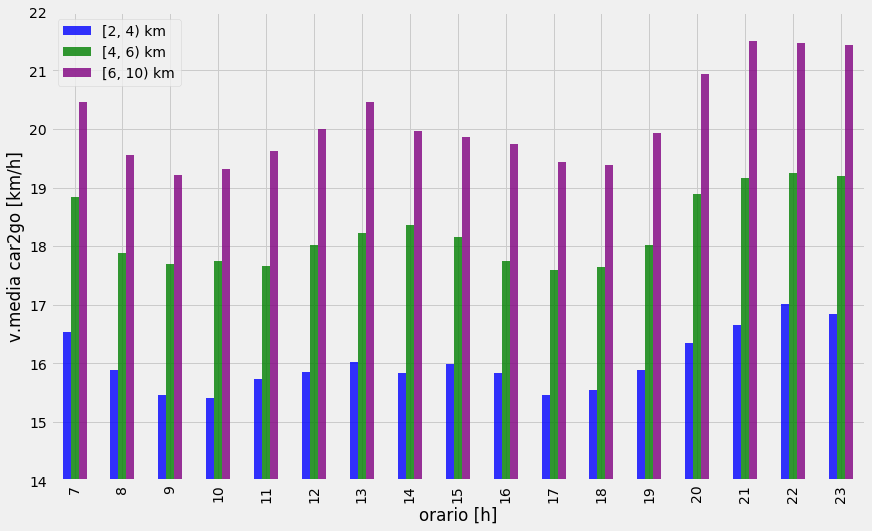

In [5]:
vmedia_week(tragitti[car_cond & car2go_cond & coherence_cond], 'Car2Go').plot.bar(color=wcolors, alpha=.8)
plt.ylim(14, 22)
plt.xlabel('orario [h]')
plt.ylabel('v.media car2go [km/h]')
plt.show()

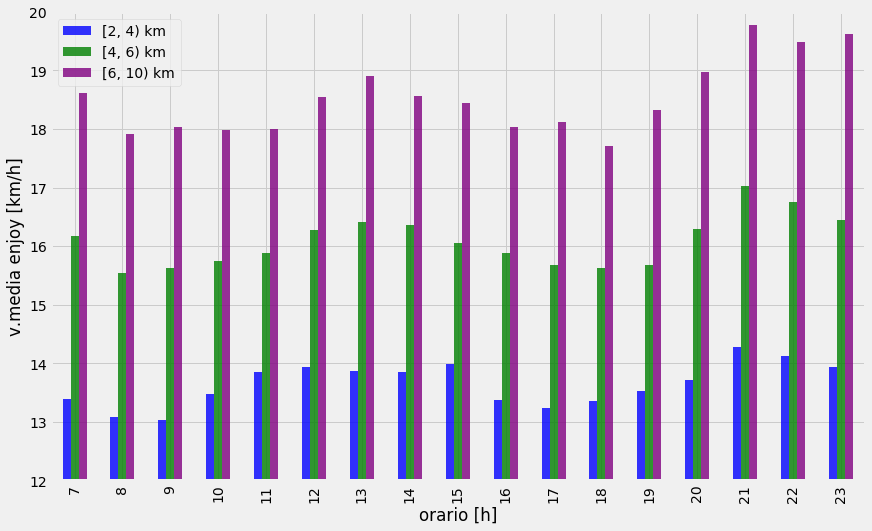

In [6]:
vmedia_week(tragitti[car_cond & enjoy_cond & coherence_cond], 'Enjoy').plot.bar(color=wcolors, alpha=.8)
plt.ylim(12, 20)
plt.xlabel('orario [h]')
plt.ylabel('v.media enjoy [km/h]')
plt.show()